In [17]:
import torch
import matplotlib.pyplot as plt
from torch import nn
import torchvision
import torchvision.transforms as transforms

In [26]:
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [34]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [62]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
        nn.Conv2d(1,64,kernel_size=3, padding = 1),
        nn.MaxPool2d((2,2), stride = 2),
        nn.Conv2d(64,128,kernel_size=3, padding = 1),
        nn.MaxPool2d((2,2), stride = 2),
        nn.Conv2d(128,64,kernel_size=3, padding = 1),
        nn.MaxPool2d((2,2), stride = 2),
        nn.ReLU(),
        nn.MaxPool2d((2,2), stride = 2))
        self.nn = nn.Sequential(nn.Linear(64,20,bias = True),
                               nn.ReLU(),
                               nn.Linear(20,10,bias = True))
    def forward(self, x):
        output = self.net(x)
        return self.nn(output.view(100,-1))

In [63]:
# Import MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

In [64]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)


In [65]:
model = CNN().to(device)

In [66]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [74]:
# Train the model
def trainModel(model, num_epochs,train_loader,optimizer):
    n_total_steps = len(train_loader)
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):  
            # origin shape: [100, 1, 28, 28]
            # resized: [100, 784]
            # images = images.reshape(-1, 28*28).to(device)
            images = images.to(device)
            labels = labels.to(device)
    
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)
    
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    
            if (i+1) % 100 == 0:
                print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

In [77]:
trainModel(model,1, train_loader, optimizer)

Epoch [1/2], Step [100/600], Loss: 0.1653
Epoch [1/2], Step [200/600], Loss: 0.0976
Epoch [1/2], Step [300/600], Loss: 0.0442
Epoch [1/2], Step [400/600], Loss: 0.0281
Epoch [1/2], Step [500/600], Loss: 0.1347
Epoch [1/2], Step [600/600], Loss: 0.1053
Epoch [2/2], Step [100/600], Loss: 0.0127
Epoch [2/2], Step [200/600], Loss: 0.0423
Epoch [2/2], Step [300/600], Loss: 0.0980
Epoch [2/2], Step [400/600], Loss: 0.0292
Epoch [2/2], Step [500/600], Loss: 0.0095
Epoch [2/2], Step [600/600], Loss: 0.0589


In [81]:
class CNN2(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
        nn.Conv2d(1,32,kernel_size=3, padding = 1),
        nn.MaxPool2d((2,2), stride = 2),
        nn.Conv2d(32,64,kernel_size=3, padding = 1),
        nn.MaxPool2d((2,2), stride = 2),
        nn.Conv2d(64,32,kernel_size=3, padding = 1),
        nn.MaxPool2d((2,2), stride = 2),
        nn.ReLU(),
        nn.MaxPool2d((2,2), stride = 2))
        self.nn = nn.Sequential(nn.Linear(32,20,bias = True),
                               nn.ReLU(),
                               nn.Linear(20,10,bias = True))
    def forward(self, x):
        output = self.net(x)
        return self.nn(output.view(100,-1))100.

In [82]:
class CNN3(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
        nn.Conv2d(1,16,kernel_size=3, padding = 1),
        nn.MaxPool2d((2,2), stride = 2),
        nn.Conv2d(16,32,kernel_size=3, padding = 1),
        nn.MaxPool2d((2,2), stride = 2),
        nn.Conv2d(32,16,kernel_size=3, padding = 1),
        nn.MaxPool2d((2,2), stride = 2),
        nn.ReLU(),
        nn.MaxPool2d((2,2), stride = 2))
        self.nn = nn.Sequential(nn.Linear(16,20,bias = True),
                               nn.ReLU(),
                               nn.Linear(20,10,bias = True))
    def forward(self, x):
        output = self.net(x)
        return self.nn(output.view(100,-1))

In [96]:
class CNN4(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
        nn.Conv2d(1,64,kernel_size=3, padding = 2),
        nn.MaxPool2d((2,2), stride = 2),
        nn.Conv2d(64,128,kernel_size=3, padding = 2),
        nn.MaxPool2d((2,2), stride = 2),
        nn.Conv2d(128,256,kernel_size=3, padding = 2),
        nn.MaxPool2d((2,2), stride = 2),
        nn.Conv2d(256,128,kernel_size=3, padding = 2),
        nn.MaxPool2d((2,2), stride = 2),
        nn.Conv2d(128,64,kernel_size=3, padding = 2),
        nn.MaxPool2d((2,2), stride = 2),
        nn.ReLU(),
        nn.MaxPool2d((2,2), stride = 2))
        self.nn = nn.Sequential(nn.Linear(64,20,bias = True),
                               nn.ReLU(),
                               nn.Linear(20,10,bias = True))
    def forward(self, x):
        output = self.net(x)
        return self.nn(output.view(100,-1))

In [132]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
import sklearn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay as cdm
def test(model, test_loader):
    with torch.no_grad():
        total = 0
        correct = 0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()  
    return correct/total

In [98]:
m1 = CNN().to(device)
m2 = CNN2().to(device)
m3 = CNN3().to(device)100.
m4 = CNN4().to(device)

o1 = torch.optim.Adam(m1.parameters(), lr=learning_rate)
o2 = torch.optim.Adam(m2.parameters(), lr=learning_rate)
o3 = torch.optim.Adam(m3.parameters(), lr=learning_rate)
o4 = torch.optim.Adam(m4.parameters(), lr=learning_rate)

In [100]:
#trainModel(m1,2, train_loader, o1)
trainModel(m2,2, train_loader, o2)
trainModel(m3,2, train_loader, o3)
trainModel(m4,2, train_loader, o4)

Epoch [1/2], Step [100/600], Loss: 0.4252
Epoch [1/2], Step [200/600], Loss: 0.2144
Epoch [1/2], Step [300/600], Loss: 0.2289
Epoch [1/2], Step [400/600], Loss: 0.0890
Epoch [1/2], Step [500/600], Loss: 0.1611
Epoch [1/2], Step [600/600], Loss: 0.2302
Epoch [2/2], Step [100/600], Loss: 0.1352
Epoch [2/2], Step [200/600], Loss: 0.1224
Epoch [2/2], Step [300/600], Loss: 0.0851
Epoch [2/2], Step [400/600], Loss: 0.0998
Epoch [2/2], Step [500/600], Loss: 0.1148
Epoch [2/2], Step [600/600], Loss: 0.1710
Epoch [1/2], Step [100/600], Loss: 0.6274
Epoch [1/2], Step [200/600], Loss: 0.3821
Epoch [1/2], Step [300/600], Loss: 0.2857
Epoch [1/2], Step [400/600], Loss: 0.1359
Epoch [1/2], Step [500/600], Loss: 0.1858
Epoch [1/2], Step [600/600], Loss: 0.1949
Epoch [2/2], Step [100/600], Loss: 0.2125
Epoch [2/2], Step [200/600], Loss: 0.2005
Epoch [2/2], Step [300/600], Loss: 0.2222
Epoch [2/2], Step [400/600], Loss: 0.0729
Epoch [2/2], Step [500/600], Loss: 0.1359
Epoch [2/2], Step [600/600], Loss:

In [151]:
m2a = test(m2,test_loader)
m3a = test(m3,test_loader)
m4a = test(m4,test_loader)
m1a = test(model,test_loader)

In [152]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [153]:
m2p = count_parameters(m2)
m3p = count_parameters(m3)
m4p = count_parameters(m4)
m1p = count_parameters(model)

In [154]:
import numpy as np
x = [m1p,m1p-m2p,m1p-m3p,m4p-m1p]


In [155]:
x = np.array(x)

In [156]:
x / m1p * 100

array([100.        ,  74.53237026,  93.34170016, 394.00259015])

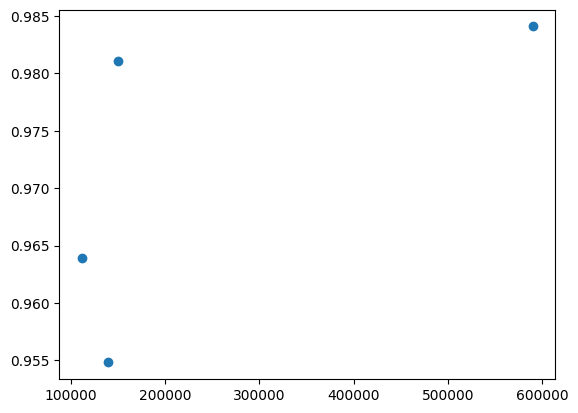

In [157]:
y = np.array([m1a, m2a, m3a, m4a])
plt.scatter(x,y)

In [158]:
y

array([0.9811, 0.9639, 0.9548, 0.9841])

In [159]:
x

array([149798, 111648, 139824, 590208])